In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [3]:
df=pd.read_csv("bestsellers with categories.csv")
print(df.head(5))

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [8]:
df.shape

(550, 7)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User Rating,550.0,4.618364,0.226980,3.3,4.5,4.7,4.80,4.9
Reviews,550.0,11953.281818,11731.132017,37.0,4058.0,8580.0,17253.25,87841.0
Price,550.0,13.100000,10.842262,0.0,7.0,11.0,16.00,105.0
Year,550.0,2014.000000,3.165156,2009.0,2011.0,2014.0,2017.00,2019.0


In [10]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [11]:
#cleaning the data
df.drop_duplicates(inplace=True)

In [12]:
df.rename(columns={"Name":"Title","Year":"Publication Year"},inplace=True)

In [14]:
df["Price"]=df["Price"].astype("float")

In [15]:
books_of_authors=df["Author"].value_counts()
print(books_of_authors)

Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
                                      ..
Keith Richards                         1
Chris Cleave                           1
Alice Schertle                         1
Celeste Ng                             1
Adam Gasiewski                         1
Name: Author, Length: 248, dtype: int64


### Since Genre is categorical value and User rating is numeric value, Box plot was used to understand the distribution of user ratings each genre.

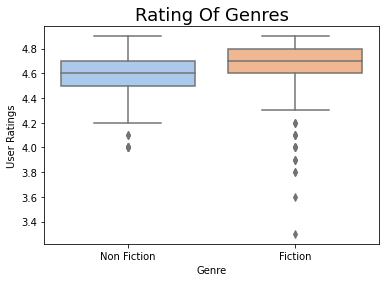

In [8]:
sns.boxplot(x="Genre", y="User Rating", data=df, palette="pastel")
plt.title('Rating Of Genres',fontsize=18)
plt.ylabel('User Ratings')
plt.xlabel('Genre')
plt.show()

### Genre distribution of Top 10 Authors can be plotted using Stacked Bar Plot

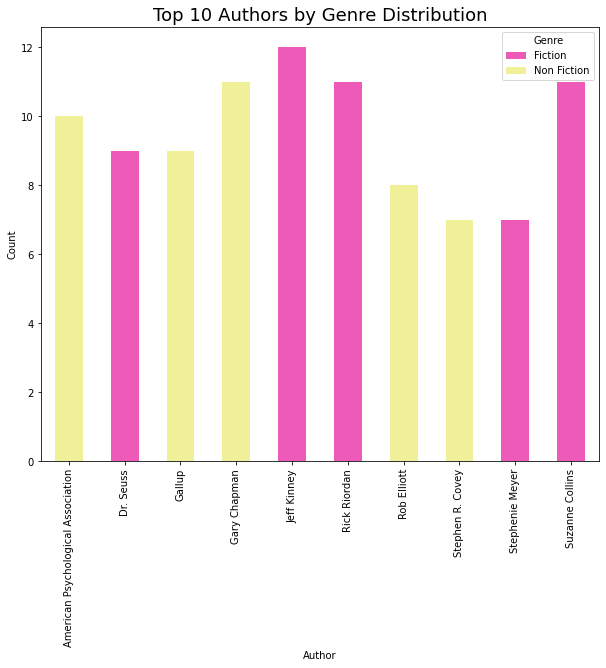

In [39]:
top_authors=df['Author'].value_counts().nlargest(10).index
filtered_df=df[df['Author'].isin(top_authors)]
counts=filtered_df.groupby(['Author','Genre']).size().unstack(fill_value=0)

plt.figure(figsize=(10,8))
colors=['#ed5ab7','#f0f099']
counts.plot(kind='bar',stacked=True,ax=plt.gca(),color=colors)
plt.title("Top 10 Authors by Genre Distribution",fontsize=18)
plt.xlabel('Author')
plt.ylabel('Count')
plt.show()

### User Ratings of Top 10 Authors using Violin Plot, 
#### here the horizontal line represents constant user rating for the author

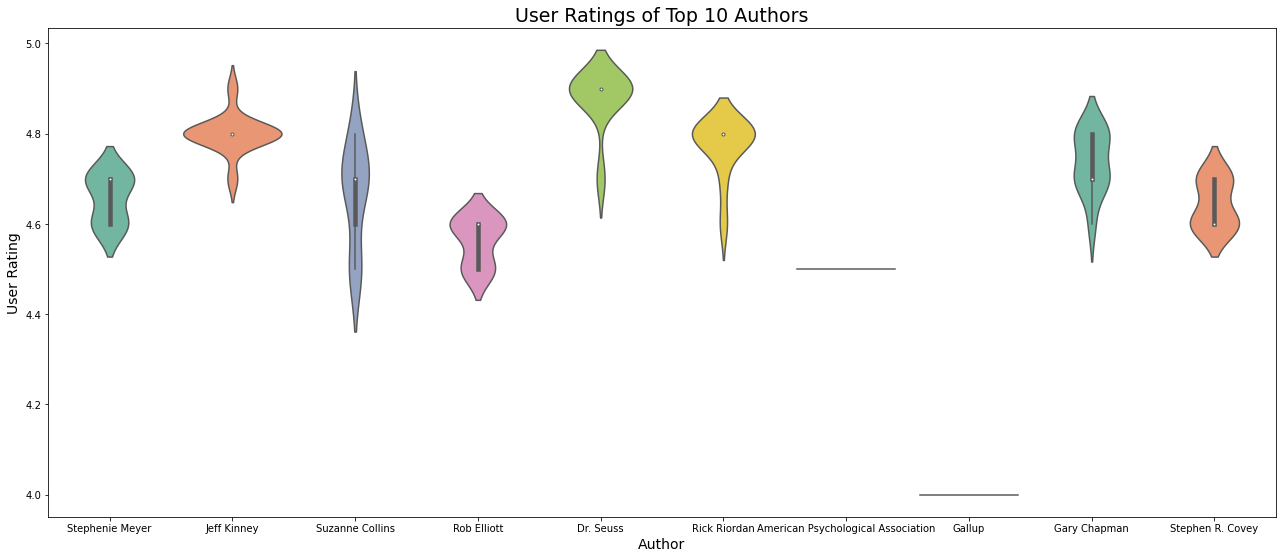

In [32]:
plt.figure(figsize=(22,9))
top_authors=df['Author'].value_counts().nlargest(10).index
filtered_df=df[df['Author'].isin(top_authors)]
sns.violinplot(x='Author',y='User Rating',data=filtered_df,palette='Set2',alpha=0.7)
plt.title('User Ratings of Top 10 Authors',fontsize=19)
plt.xlabel('Author',fontsize=14)
plt.ylabel('User Rating',fontsize=14)
plt.show()

### To map Top Authors with Publication Year using heat map

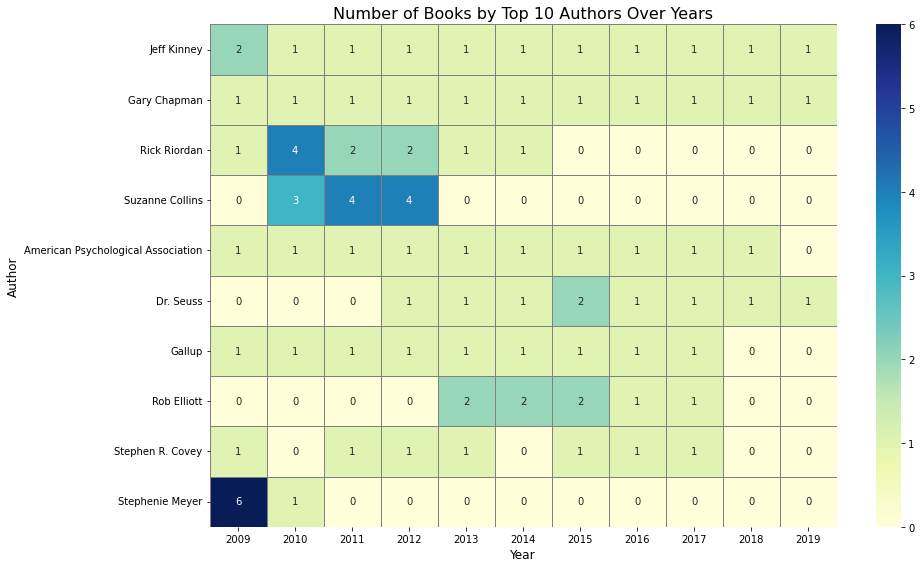

In [40]:
heatmap_data = df.groupby(['Author', 'Year']).size().unstack(fill_value=0)
top_authors = df['Author'].value_counts().nlargest(10).index
heatmap_data = heatmap_data.loc[top_authors]
plt.figure(figsize=(14,8))
sns.heatmap(heatmap_data,annot=True,fmt="d",cmap="YlGnBu", linewidths=0.5,linecolor='gray')
plt.title("Number of Books by Top 10 Authors Over Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Author", fontsize=12)
plt.tight_layout()
plt.show()
